## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from functools import partial



from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
test.shape

(28000, 784)

In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [147]:

X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [6]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    'tree': DecisionTreeClassifier(),
    'forest': linear_model.SGDClassifier(n_jobs=-1),
    'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [7]:
results=pd.DataFrame(columns=['model','Mean_cross_val_Accuracy','Valid_Accuracy'])

In [10]:
%%time
for est in estimators: 
    globals()[est]=estimators[est]
    eval(est).fit(X_train,y_train)
    cross_val_scores = cross_val_score(eval(est), X_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est).predict(X_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9622452608908219  Valid_Accuracy:  0.9655555555555555
____________________________________________________________________
tree Mean_cross_val_Accuracy  0.8427567137206065  Valid_Accuracy:  0.8465873015873016
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


forest Mean_cross_val_Accuracy  0.8566004171834459  Valid_Accuracy:  0.8626190476190476
____________________________________________________________________


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVC Mean_cross_val_Accuracy  0.8496235780624414  Valid_Accuracy:  0.8692063492063492
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9310206088617065  Valid_Accuracy:  0.9292063492063493
____________________________________________________________________
Wall time: 10min 59s


### Ок, определили у нас лучше все рабоатют knn и  XGB. Оставим пока только их для дальнеших тестов

In [11]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
4,XGB,0.931021,0.929206
3,SVC,0.849624,0.869206
2,forest,0.856600,0.862619
1,tree,0.842757,0.846587


In [12]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [13]:
confusion_matrix(knn.predict(X_valid),y_valid)

array([[1196,    0,   10,    3,    2,    1,    9,    0,    2,    8],
       [   0, 1384,   19,    5,   11,    3,    3,   26,   14,    3],
       [   0,    1, 1223,    9,    0,    0,    1,    2,    3,    1],
       [   0,    0,    4, 1299,    0,   30,    0,    0,   19,   13],
       [   0,    0,    2,    0, 1181,    1,    1,    2,    3,   13],
       [   0,    0,    2,   14,    0, 1034,    2,    0,   20,    1],
       [   4,    4,    2,    2,    4,   11, 1239,    0,    5,    0],
       [   0,    0,   28,    8,    2,    0,    0, 1311,    2,   18],
       [   0,    0,    4,    7,    0,    1,    1,    0, 1127,    2],
       [   0,    0,    0,    8,   22,    4,    0,   18,   14, 1172]],
      dtype=int64)

### Любопытно, что мы не угадываем

In [14]:
y_pred=knn.predict(X_valid)

In [15]:
def draw_numbers(X,y_test,y_pred,row=5,col=4):
    fig = plt.figure(figsize=(20, 10))
    ax = []
    for i, img in enumerate(X[0:row*col], 1):
        ax.append( fig.add_subplot(row, col, i) )
        ax[-1].set_title('y_p '+str(y_pred[i - 1])+';'+'y_t '+str(y_test[i - 1])) 
        plt.axis('off')
        plt.imshow(img, cmap='gray')
    

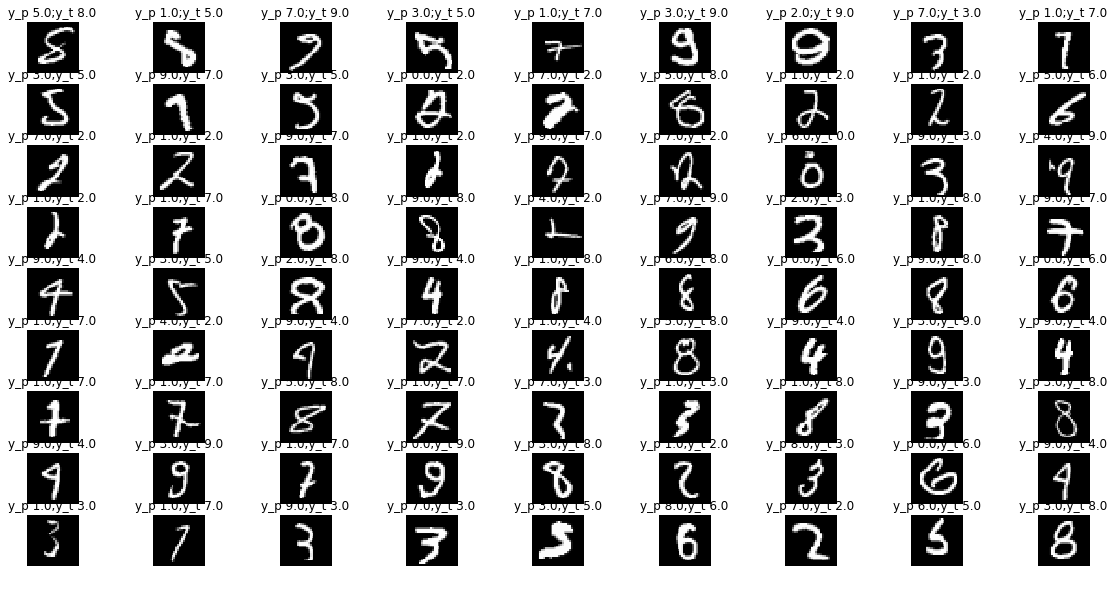

In [150]:
draw_numbers(np.resize(X_valid[np.where( y_pred!= y_valid )], (X_valid[np.where( y_pred!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred!= y_valid )],y_pred[np.where( y_pred!= y_valid)],9,9)

In [17]:
# Если честно, я многие из них сам не могу угадать

### Засабмитим для любопытссва реузультат KNN

In [18]:
pred_test=knn.predict(np.resize(test_img, (test.shape[0], 28*28)))

In [61]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

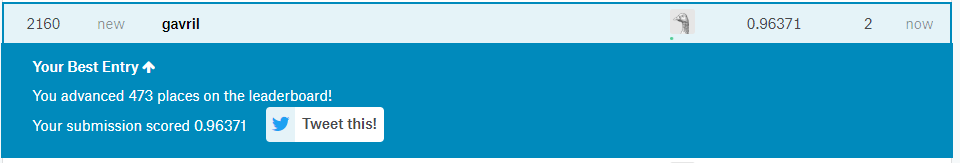

In [92]:
from IPython.display import Image
Image('submit_without_all.png')

### Фильтр Лапласса


In [19]:
def laplas(img):
    img_transf = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
    return img_transf

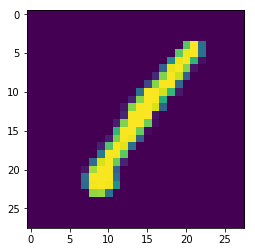

In [20]:
plt.imshow(train_img[0])

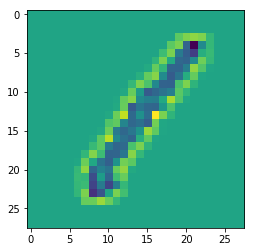

In [21]:


plt.imshow(laplas(train_img[0]))

In [22]:
train_img_laplas= np.array(list(map(laplas, train_img)))

In [128]:
test_img_laplas= np.array(list(map(laplas, test_img)))

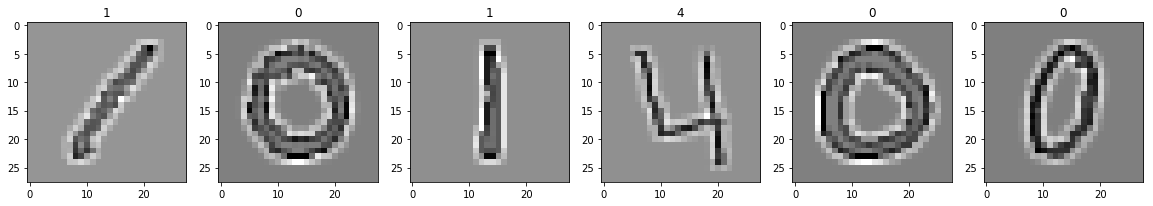

In [23]:
fig2 = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img_laplas[: 6],1):    
    subplot2 = fig2.add_subplot(1,6,i)
    plt.imshow(img, cmap='gray')
    plt.title('%d' % train_label[i - 1])

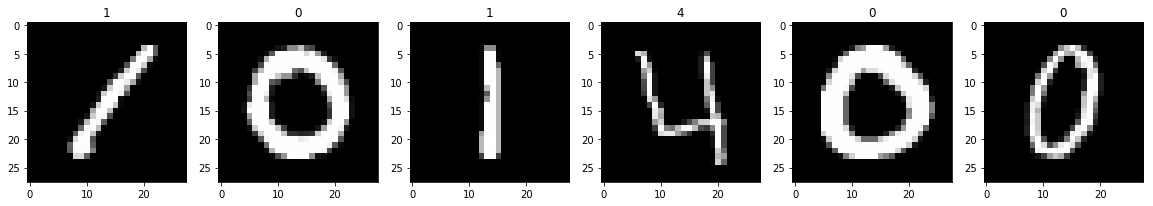

In [24]:
fig2 = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[: 6],1):    
    subplot2 = fig2.add_subplot(1,6,i)
    plt.imshow(img, cmap='gray')
    plt.title('%d' % train_label[i - 1])
    

In [151]:
X_train_laplas, X_valid_laplas, y_train, y_valid = train_test_split(np.resize(train_img_laplas, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [26]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}
for est in estimators: 
    globals()[est+'_laplas']=estimators[est]
    eval(est+'_laplas').fit(X_train_laplas,y_train)
    cross_val_scores = cross_val_score(eval(est+'_laplas'), X_train_laplas,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid_, eval(est+'_laplas').predict(X_valid_laplas))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_laplas' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.8231647347025518  Valid_Accuracy:  0.8376984126984127
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9143889126829032  Valid_Accuracy:  0.9172222222222223
____________________________________________________________________


In [27]:
# сильно упала тчоность особенно для knn

In [28]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.842757,0.846587
2,forest,0.856600,0.862619
3,SVC,0.849624,0.869206
4,XGB,0.931021,0.929206
5,knn_laplas,0.823165,0.837698
6,XGB_laplas,0.914389,0.917222


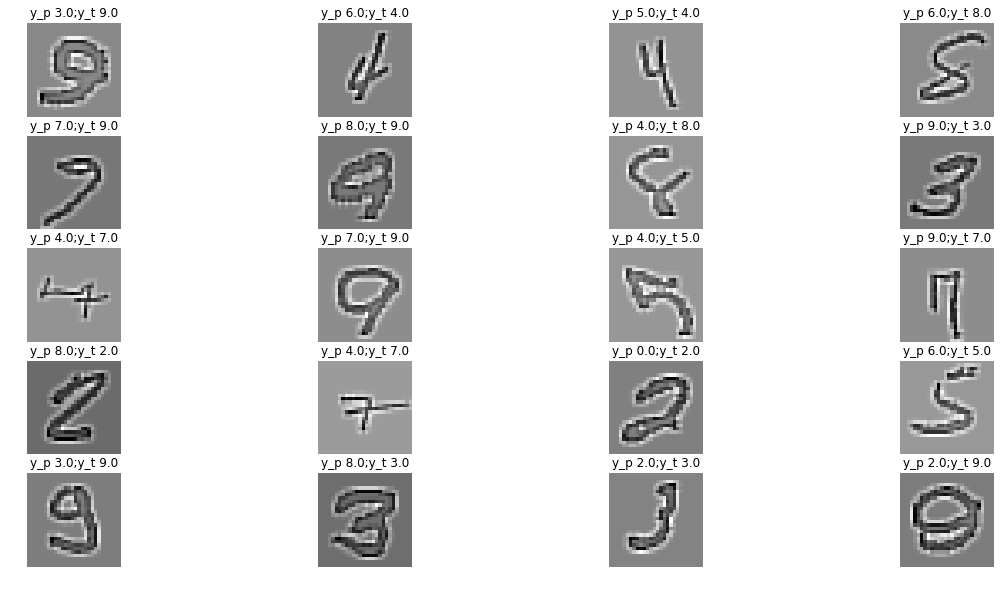

In [189]:
draw_numbers(np.resize(X_valid_laplas[np.where( y_pred_laplas!= y_valid )], (X_valid_laplas[np.where( y_pred_laplas!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred_laplas!= y_valid )],y_pred_laplas[np.where( y_pred_laplas!= y_valid )])

### Фильтр Cобеля

In [29]:
def sobel(X,ksize=3):
    sobel_x = np.zeros_like(X)
    sobel_y = np.zeros_like(X)
    for i in range(len(X)):
        sobel_x[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=1, dy=0, ksize=ksize)[:, 0]
        sobel_y[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=0, dy=1, ksize=ksize)[:, 0]
        
    g, theta = cv2.cartToPolar(sobel_x, sobel_y)
    #angle and length of a vector
    #grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
    return g 

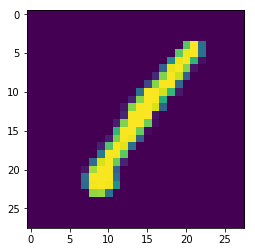

In [30]:
plt.imshow(train_img[0])

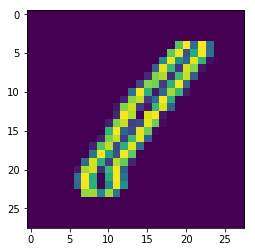

In [31]:
plt.imshow(sobel(train_img[0]))

In [32]:
%%time
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}
train_img_sobel= np.array(list(map(sobel, train_img)))
X_train_sobel, X_valid_sobel, y_train, y_valid = train_test_split(np.resize(train_img_sobel, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
for est in estimators: 
    globals()[est+'_sobel']=estimators[est]
    eval(est+'_sobel').fit(X_train_sobel,y_train)
    cross_val_scores = cross_val_score(eval(est+'_sobel'), X_train_sobel,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_sobel').predict(X_valid_sobel))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_sobel' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9398303192351116  Valid_Accuracy:  0.9458730158730159
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9121432273630964  Valid_Accuracy:  0.915
____________________________________________________________________


In [36]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
7,knn_sobel,0.939830,0.945873
4,XGB,0.931021,0.929206
6,XGB_laplas,0.914389,0.917222
8,XGB_sobel,0.912143,0.915000
3,SVC,0.849624,0.869206
2,forest,0.856600,0.862619
1,tree,0.842757,0.846587
5,knn_laplas,0.823165,0.837698


In [193]:
X_train_sobel, X_valid_sobel, y_train, y_valid = train_test_split(np.resize(train_img_sobel, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

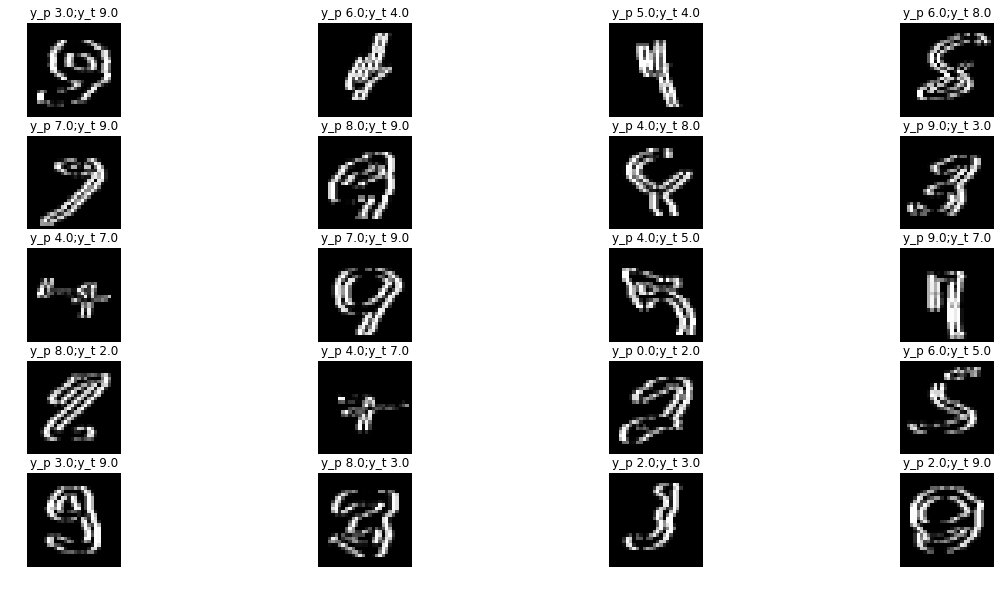

In [203]:
draw_numbers(np.resize(X_valid_sobel[np.where( y_pred_sobel!= y_valid )], (X_valid_sobel[np.where( y_pred_sobel!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred_sobel!= y_valid )],y_pred_sobel[np.where( y_pred_sobel!= y_valid)])

In [292]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.842757,0.846587
2,forest,0.856600,0.862619
3,SVC,0.849624,0.869206
4,XGB,0.931021,0.929206
5,knn_laplas,0.823165,0.837698
6,XGB_laplas,0.914389,0.917222
7,knn_sobel,0.939830,0.945873
8,XGB_sobel,0.912143,0.915000
9,knn_median_k_size_3,0.921327,0.927222


### Медианный фильтр

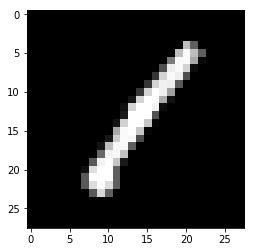

In [37]:
def median_filter(img, ksize=3):
    #print(img.shape)
    result = np.zeros_like(img)
    for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                
                row_top = max(0, row - ksize // 2)
                row_bottom = min(img.shape[0] - 1, row + ksize // 2)
                
                col_left = max(0, col - ksize // 2)
                col_right = min(img.shape[1] - 1, col + ksize // 2)
                img_slice = img[row_top:row_bottom+1, col_left:col_right+1]
                result[row, col] = np.median(img_slice.reshape(-1))
    
    
    return result
plt.imshow(median_filter(train_img[0]), cmap='gray')

In [38]:
ksizes=[1,2,3,5,8]

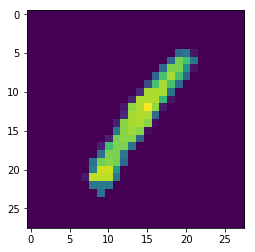

In [39]:
def median_filter(img, ksize=9):
    img=np.float32(img)
    median = cv2.medianBlur(img,5)
    return median
plt.imshow(median_filter(train_img[0]))

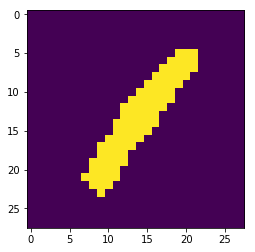

In [44]:
ksizes=[3]
def median_filter(img, ksize=9):
    img=np.float32(binar(img))
    median = cv2.medianBlur(img,5)
    return median
plt.imshow(median_filter(train_img[0]))

In [46]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

for ker  in ksizes:
    
       
    globals()['train_img_median'+'_k_size_'+str(ker)]=np.array(list(map(partial(median_filter,ksize=ker),train_img)))
    X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_median'+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
    for est in estimators: 
        globals()[est+'_median'+'_k_size_'+str(ker)]=estimators[est]
        eval(est+'_median'+'_k_size_'+str(ker)).fit(X_train,y_train)
        cross_val_scores = cross_val_score(eval(est+'_median'+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
        valid_score=accuracy_score(y_valid, eval(est+'_median'+'_k_size_'+str(ker)).predict(X_valid))
        print('____________________________________________________________________')
        print(ker)
        print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
        results = results.append({'model' : est+'_median'+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
           

____________________________________________________________________
3
knn Mean_cross_val_Accuracy  0.9286395054568853  Valid_Accuracy:  0.9313492063492064
____________________________________________________________________
3
XGB Mean_cross_val_Accuracy  0.8955788817796343  Valid_Accuracy:  0.8948412698412699


In [47]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
7,knn_sobel,0.939830,0.945873
17,knn_median_k_size_3,0.928640,0.931349
4,XGB,0.931021,0.929206
15,knn_median_k_size_9,0.921327,0.927222
13,knn_median_k_size_7,0.921327,0.927222
11,knn_median_k_size_5,0.921327,0.927222
9,knn_median_k_size_3,0.921327,0.927222
6,XGB_laplas,0.914389,0.917222
8,XGB_sobel,0.912143,0.915000


In [ ]:
train_img_median_k_size_3

In [204]:
X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img_median_k_size_3, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [207]:
y_pred_knn_median_k_size_3=knn_median_k_size_3.predict(X_valid)

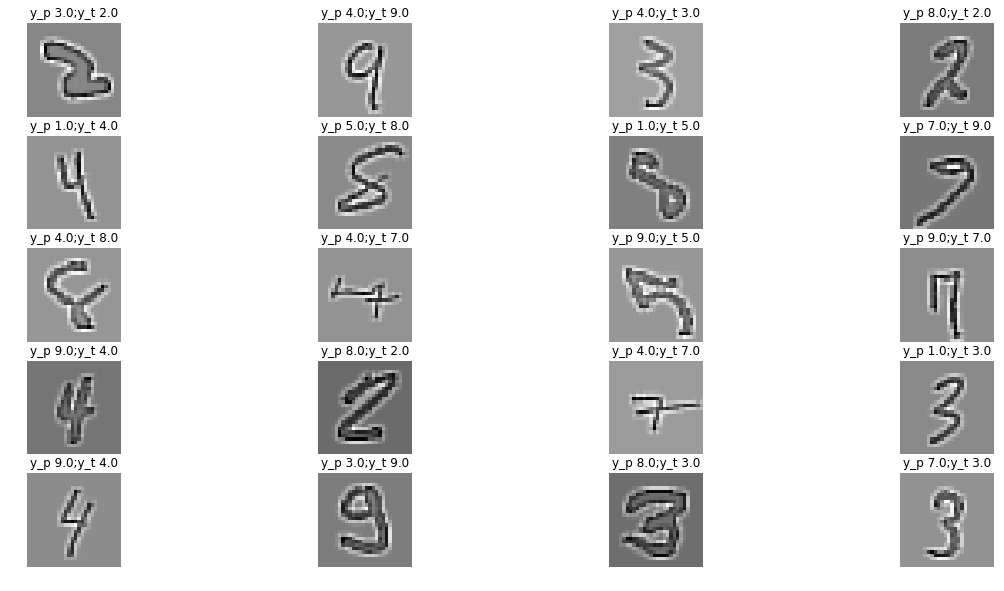

In [209]:
draw_numbers(np.resize(X_valid[np.where( y_pred_knn_median_k_size_3!= y_valid )], (X_valid[np.where( y_pred_knn_median_k_size_3!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred_knn_median_k_size_3!= y_valid )],y_pred_knn_median_k_size_3[np.where( y_pred_knn_median_k_size_3!= y_valid )])

### Distance transform

In [48]:
def binar(img,threshold=5, max_value=255.0):
    return max_value * (img > threshold)

In [49]:
def dist_transf(img,typedist='cv.DIST_L1',mask=5):
    img=np.array(binar(img), dtype=np.uint8)
    dt = cv.distanceTransform(img, typedist,mask )          
    return dt

In [50]:
import cv2 as cv
typedists=['cv.DIST_L2','cv.DIST_L1']
masks=[3,5]
for typ  in typedists:
    for mask in masks:
        #print(ker,met)
        #print('train_img_deckew_'+met+'_k_size_'+str(ker))
        globals()['train_img_'+typ[3:]+'_mask_'+str(mask)]=np.array(list(map(partial(dist_transf,typedist=eval(typ),mask=mask),train_img)))
        X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_'+typ[3:]+'_mask_'+str(mask)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
        for est in estimators: 
            globals()[est+'_'+typ[3:]+'_mask_'+str(mask)]=estimators[est]
            eval(est+'_'+typ[3:]+'_mask_'+str(mask)).fit(X_train,y_train)
            cross_val_scores = cross_val_score(eval(est+'_'+typ[3:]+'_mask_'+str(mask)), X_train,y_train, cv=2,n_jobs=-1)
            valid_score=accuracy_score(y_valid, eval(est+'_'+typ[3:]+'_mask_'+str(mask)).predict(X_valid))
            print('____________________________________________________________________')
            print(typ ,mask)
            print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
            results = results.append({'model' : est+'_'+typ[3:]+'_mask_'+str(mask) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)

____________________________________________________________________
cv.DIST_L2 3
knn Mean_cross_val_Accuracy  0.9485036965801971  Valid_Accuracy:  0.9593650793650793
____________________________________________________________________
cv.DIST_L2 3
XGB Mean_cross_val_Accuracy  0.9269727831361523  Valid_Accuracy:  0.9287301587301587
____________________________________________________________________
cv.DIST_L2 5
knn Mean_cross_val_Accuracy  0.9496261594636708  Valid_Accuracy:  0.9606349206349206
____________________________________________________________________
cv.DIST_L2 5
XGB Mean_cross_val_Accuracy  0.9267687570321395  Valid_Accuracy:  0.9285714285714286
____________________________________________________________________
cv.DIST_L1 3
knn Mean_cross_val_Accuracy  0.9464967966402296  Valid_Accuracy:  0.9563492063492064
____________________________________________________________________
cv.DIST_L1 3
XGB Mean_cross_val_Accuracy  0.9268027937767189  Valid_Accuracy:  0.927142857142857

In [51]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
21,knn_DIST_L2_mask_5,0.949626,0.960635
19,knn_DIST_L2_mask_3,0.948504,0.959365
25,knn_DIST_L1_mask_5,0.946497,0.956349
23,knn_DIST_L1_mask_3,0.946497,0.956349
7,knn_sobel,0.939830,0.945873
17,knn_median_k_size_3,0.928640,0.931349
4,XGB,0.931021,0.929206
20,XGB_DIST_L2_mask_3,0.926973,0.928730
22,XGB_DIST_L2_mask_5,0.926769,0.928571


In [210]:
X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img_DIST_L2_mask_5, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [211]:
y_pred_knn_DIST_L2_mask_5=knn_DIST_L2_mask_5.predict(X_valid)

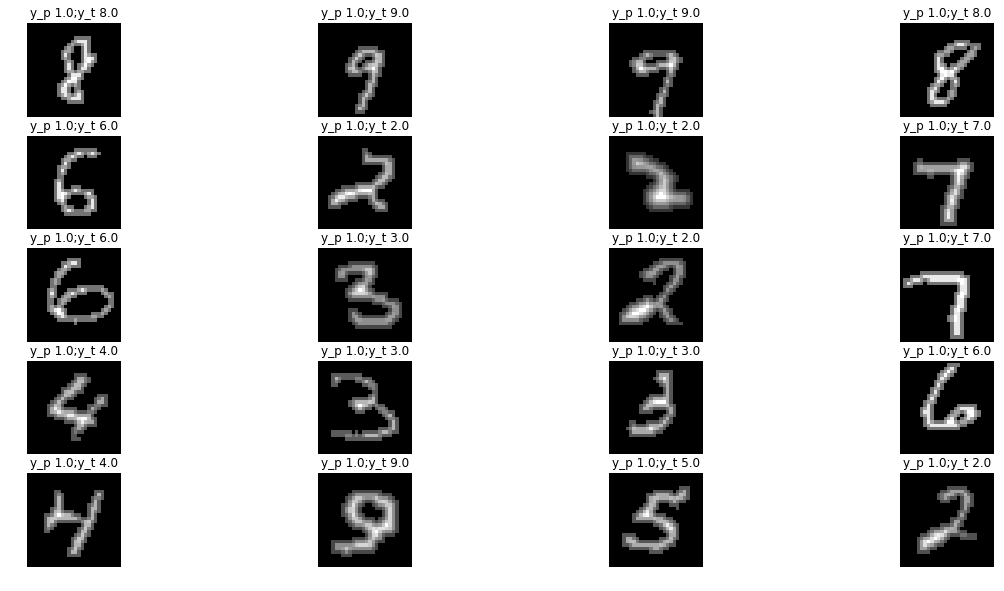

In [212]:
draw_numbers(np.resize(X_valid[np.where( y_pred_knn_DIST_L2_mask_5!= y_valid )], (X_valid[np.where( y_pred_knn_DIST_L2_mask_5!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred_knn_DIST_L2_mask_5!= y_valid )],y_pred_knn_DIST_L2_mask_5[np.where( y_pred_knn_DIST_L2_mask_5!= y_valid )])

### Gaussian Blurring

In [52]:
def gaussblur_filter(img,ksize=3):
    img=np.array(binar(img), dtype=np.uint8)
    gb = cv2.GaussianBlur(img,(ksize,ksize),0 )          
    return gb

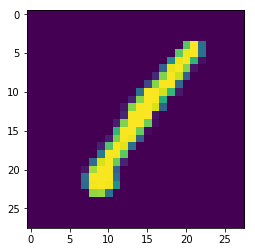

In [53]:
plt.imshow(train_img[0])

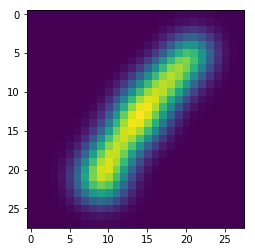

In [54]:
plt.imshow(gaussblur_filter(train_img[0],9))

In [55]:
ksizes=[3,5,7]
for ker  in ksizes:
    
       
    globals()['train_img_gauss'+'_k_size_'+str(ker)]=np.array(list(map(partial(gaussblur_filter,ksize=ker),train_img)))
    X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_gauss'+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
    for est in estimators: 
        globals()[est+'_gauss'+'_k_size_'+str(ker)]=estimators[est]
        eval(est+'_gauss'+'_k_size_'+str(ker)).fit(X_train,y_train)
        cross_val_scores = cross_val_score(eval(est+'_gauss'+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
        valid_score=accuracy_score(y_valid, eval(est+'_gauss'+'_k_size_'+str(ker)).predict(X_valid))
        print('____________________________________________________________________')
        print(ker)
        print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
        results = results.append({'model' : est+'_gauss'+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)

____________________________________________________________________
3
knn Mean_cross_val_Accuracy  0.9649663032872182  Valid_Accuracy:  0.9677777777777777
____________________________________________________________________
3
XGB Mean_cross_val_Accuracy  0.9382651724475972  Valid_Accuracy:  0.9392857142857143
____________________________________________________________________
5
knn Mean_cross_val_Accuracy  0.9636056315243705  Valid_Accuracy:  0.9652380952380952
____________________________________________________________________
5
XGB Mean_cross_val_Accuracy  0.9406125688805368  Valid_Accuracy:  0.941984126984127
____________________________________________________________________
7
knn Mean_cross_val_Accuracy  0.9588773925072525  Valid_Accuracy:  0.9619047619047619
____________________________________________________________________
7
XGB Mean_cross_val_Accuracy  0.9360548025391775  Valid_Accuracy:  0.9393650793650794


In [228]:
test_img_gauss_k_size_3=np.array(list(map(partial(gaussblur_filter,ksize=3),test_img)))

In [233]:
test_img_gauss_k_size_3=np.resize(test_img_gauss_k_size_3, (test.shape[0], 28*28))

In [236]:
pred_knn_gauss_k_size_3=knn_gauss_k_size_3.predict(test_img_gauss_k_size_3)

In [237]:
with open('submit_knn_gauss_k_size_3.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_knn_gauss_k_size_3, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

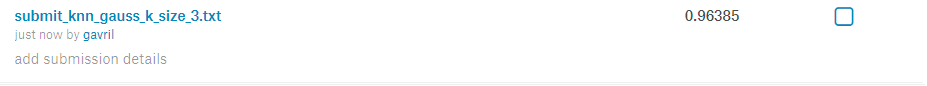

In [238]:
from IPython.display import Image
Image('submit_knn_gauss_k_size_3.png')

In [213]:
X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img_gauss_k_size_3, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [222]:
y_pred_knn_gauss_k_size_3=knn_gauss_k_size_3.predict(X_valid)

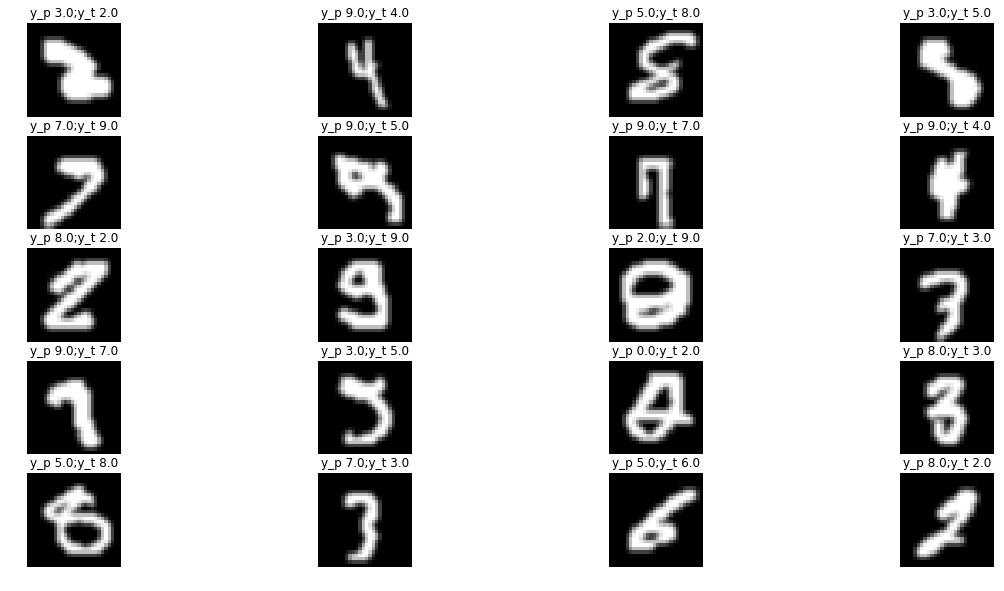

In [223]:
draw_numbers(np.resize(X_valid[np.where( y_pred_knn_gauss_k_size_3!= y_valid )], (X_valid[np.where( y_pred_knn_gauss_k_size_3!= y_valid )].shape[0], 28, 28)),y_valid[np.where( y_pred_knn_gauss_k_size_3!= y_valid )],y_pred_knn_gauss_k_size_3[np.where( y_pred_knn_gauss_k_size_3!= y_valid )])

In [56]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.842757,0.846587
2,forest,0.856600,0.862619
3,SVC,0.849624,0.869206
4,XGB,0.931021,0.929206
5,knn_laplas,0.823165,0.837698
6,XGB_laplas,0.914389,0.917222
7,knn_sobel,0.939830,0.945873
8,XGB_sobel,0.912143,0.915000
9,knn_median_k_size_3,0.921327,0.927222


### deskew

In [65]:
def deskew(img):
    SZ=img.shape[0]
    
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        # no deskewing needed. 
        return img.copy()
    # Calculate skew based on central momemts. 
    skew = m['mu11']/m['mu02']
    # Calculate affine transform to correct skewness. 
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    # Apply affine transform
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

In [66]:
train_img_deckew= np.array(list(map(deskew, train_img)))


In [67]:
test_img_deckew= np.array(list(map(deskew, test_img)))

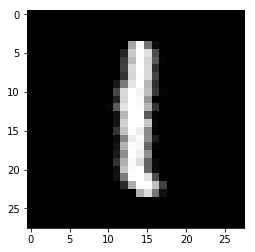

In [68]:
plt.imshow(deskew(train_img_deckew[0]), cmap='gray')

In [69]:
X_train_deckew, X_valid_deckew, y_train, y_valid_ = train_test_split(np.resize(train_img_deckew, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [70]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

for est in estimators: 
    globals()[est+'_deckew']=estimators[est]
    eval(est+'_deckew').fit(X_train_deckew,y_train)
    cross_val_scores = cross_val_score(eval(est+'_deckew'), X_train_deckew,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_deckew').predict(X_valid_deckew))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_deckew' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.9533669330147386  Valid_Accuracy:  0.9499206349206349
____________________________________________________________________


In [71]:
# поворот дал почти процент прироста точности на валидацинной выборке

In [72]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
33,knn_deckew,0.973912,0.976587
27,knn_gauss_k_size_3,0.964966,0.967778
0,knn,0.962245,0.965556
29,knn_gauss_k_size_5,0.963606,0.965238
31,knn_gauss_k_size_7,0.958877,0.961905
21,knn_DIST_L2_mask_5,0.949626,0.960635
19,knn_DIST_L2_mask_3,0.948504,0.959365
25,knn_DIST_L1_mask_5,0.946497,0.956349
23,knn_DIST_L1_mask_3,0.946497,0.956349
34,XGB_deckew,0.953367,0.949921


In [124]:
pred_test_deckew=knn_deckew.predict(np.resize(test_img_deckew, (test.shape[0], 28*28)))

In [125]:
pred_test_deckew

array([2., 0., 9., ..., 3., 9., 2.])

In [126]:
with open('submit_knn_deckew.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_deckew, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

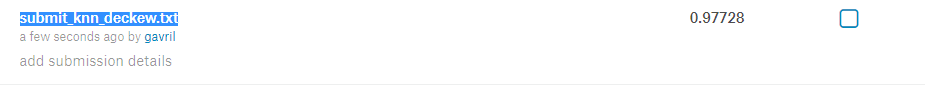

In [127]:
from IPython.display import Image
Image('submit_knn_deckew.png')

In [271]:
X_train_deckew, X_valid_deckew, y_train, y_valid_ = train_test_split(np.resize(train_img_deckew, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [274]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [275]:
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9,11,15,20,40,100,200],
    'p': [1, 2],
    'weights':['uniform','distance']
}

In [276]:
knn = KNeighborsClassifier(n_jobs=-1)
grid_knn = GridSearchCV(knn, knn_params, scoring='accuracy', cv=3,n_jobs=-1, verbose=10)
grid_knn.fit(X_train_deckew, y_train)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed: 58.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 107 out of 132 | elapsed: 88.5min remaining: 20.7min
[Parallel(n_jobs=-1)]: Done 121 out of 132 | elapsed: 96.2min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed: 99.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 15, 20, 40, 100, 200], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [277]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)
print(grid_knn.best_estimator_)

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.9743537414965986
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='distance')


In [280]:
accuracy_score(y_valid_ , grid_knn.best_estimator_.predict(X_valid_deckew))

0.9776984126984127

In [283]:
import xgboost

In [285]:
%%time

XGB_params = {
           'max_depth': [2,3,4,5,6,7,8,25,50], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5,0.6,0.7,0.8,0.9,1],
    'n_estimators': [10,30,40,50,80,100,350,500,700],
    'reg_alpha': [0,0.01, 0.02, 0.03, 0.04],
    'learning_rate':[0.01, 0.05,0.1,0.2]
}

    

grid_XGB =  RandomizedSearchCV(xgboost.XGBClassifier(n_jobs=-1),XGB_params,scoring='accuracy',
                       cv=3,n_jobs=-1, verbose=10)
grid_XGB.fit(X_train_deckew, y_train)
print(grid_XGB.best_params_)
print(grid_XGB.best_score_)
print(grid_XGB.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:  2.3min remaining: 20.8min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed: 10.0min remaining: 32.9min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed: 12.0min remaining: 20.7min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 20.1min remaining: 20.1min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 21.8min remaining: 12.6min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 24.2min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 27.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 29.6min finished


{'subsample': 0.9, 'reg_alpha': 0.04, 'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.7}
0.9748639455782313
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0.04, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.9)
Wall time: 39min 48s


In [286]:
accuracy_score(y_valid_ , grid_XGB.best_estimator_.predict(X_valid_deckew))

0.9782539682539683

In [109]:
test_img_gauss_k_size_3=np.array(list(map(partial(gaussblur_filter,ksize=3),train_img)))

In [110]:
train_img_deckew_gauss= np.array(list(map(deskew, train_img_gauss_k_size_3)))


In [111]:
test_img_deckew_gauss= np.array(list(map(deskew, test_img_gauss_k_size_3)))

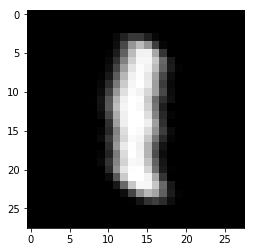

In [112]:
plt.imshow(deskew(train_img_deckew_gauss[0]), cmap='gray')

In [79]:
X_train_deckew_gauss, X_valid_deckew_gauss, y_train, y_valid_ = train_test_split(np.resize(train_img_deckew_gauss, (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)

In [113]:
%%time

estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    #'XGB': XGBClassifier(n_jobs=-1)
}

for est in estimators: 
    globals()[est+'_deckew_gauss']=estimators[est]
    eval(est+'_deckew_gauss').fit(X_train_deckew,y_train)
    cross_val_scores = cross_val_score(eval(est+'_deckew_gauss'), X_train_deckew,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_deckew_gauss').predict(X_valid_deckew))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_deckew_gauss' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.9739117620901359  Valid_Accuracy:  0.9765873015873016
____________________________________________________________________
Wall time: 2min 38s


In [ ]:
knn_deckew_gauss

In [120]:
pred_test_deckew_gauss=knn_deckew_gauss.predict(np.resize(test_img_deckew_gauss, (test.shape[0], 28*28)))

In [83]:
pred_test_deckew

array([2., 0., 9., ..., 3., 9., 2.])

In [121]:
with open('pred_test_deckew_gauss.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_deckew, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

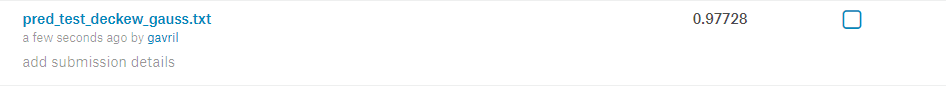

In [123]:
from IPython.display import Image
Image('pred_test_deckew_gauss.png')

In [119]:
pd.set_option('display.max_rows', 120) # display all columns

In [81]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
35,knn_deckew_gauss,0.973912,0.976587
33,knn_deckew,0.973912,0.976587
27,knn_gauss_k_size_3,0.964966,0.967778
0,knn,0.962245,0.965556
29,knn_gauss_k_size_5,0.963606,0.965238
31,knn_gauss_k_size_7,0.958877,0.961905
21,knn_DIST_L2_mask_5,0.949626,0.960635
19,knn_DIST_L2_mask_3,0.948504,0.959365
25,knn_DIST_L1_mask_5,0.946497,0.956349
23,knn_DIST_L1_mask_3,0.946497,0.956349


In [35]:
results

,model,Mean_cross_val_Accuracy,Valid_Accuracy
0,knn,0.962245,0.965556
1,tree,0.842757,0.846587
2,forest,0.856600,0.862619
3,SVC,0.849624,0.869206
4,XGB,0.931021,0.929206
5,knn_laplas,0.823165,0.837698
6,XGB_laplas,0.914389,0.917222
7,knn_sobel,0.939830,0.945873
8,XGB_sobel,0.912143,0.915000


### Попробуем некокторые морфологческие преобразования

In [ ]:
# Биноризуем картинки

In [ ]:
plt.imshow(train_img_deckew[1], cmap='gray')

In [84]:
def binar(img,threshold=5, max_value=255.0):
    return max_value * (img > threshold)

In [ ]:
plt.imshow(binar(train_img_deckew[1]))

In [ ]:
a=binar(train_img_deckew[1])


In [ ]:
a=train_img_deckew[1]

In [85]:
test_img_deckew= np.array(list(map(deskew, test_img)))

In [86]:
def Morpholog_transformation(img,method='erode',k_size=2):
    img=binar(img)
    kernel = np.ones((k_size, k_size), np.float32)
    ret = np.zeros_like(img)
    for i in range(len(img)):
       # ret=2
        if    method == 'erode':
            ret[i] = cv2.erode(img[i],kernel,iterations = 1)[:, 0]
        elif  method == 'dilate':
            ret[i] = cv2.dilate(img[i],kernel,iterations = 1)[:, 0]
        elif  method == 'open':
            ret[i] = cv2.morphologyEx(img[i], cv2.MORPH_OPEN,kernel)[:, 0]
        elif  method == 'close':
            ret[i] = cv2.morphologyEx(img[i],cv2.MORPH_CLOSE,kernel)[:, 0]
    return ret

In [87]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [88]:
kernels=[1,2,3,5,8]
methods=['erode','dilate','open','close']
for ker  in kernels:
    for met in methods:
        #print(ker,met)
        #print('train_img_deckew_'+met+'_k_size_'+str(ker))
        globals()['train_img_deckew_'+met+'_k_size_'+str(ker)]=np.array(list(map(partial(Morpholog_transformation,method=met,k_size=ker),train_img_deckew)))
        X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_deckew_'+met+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
        for est in estimators: 
            globals()[est+'_deckew_'+met+'_k_size_'+str(ker)]=estimators[est]
            eval(est+'_deckew_'+met+'_k_size_'+str(ker)).fit(X_train,y_train)
            cross_val_scores = cross_val_score(eval(est+'_deckew_'+met+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
            valid_score=accuracy_score(y_valid, eval(est+'_deckew_'+met+'_k_size_'+str(ker)).predict(X_valid))
            print('____________________________________________________________________')
            print(ker,met)
            print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
            results = results.append({'model' : est+'_deckew_'+met+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
           

____________________________________________________________________
1 erode
knn Mean_cross_val_Accuracy  0.963401283901136  Valid_Accuracy:  0.9652380952380952
____________________________________________________________________
1 erode
XGB Mean_cross_val_Accuracy  0.9458167437498339  Valid_Accuracy:  0.9458730158730159
____________________________________________________________________
1 dilate
knn Mean_cross_val_Accuracy  0.963401283901136  Valid_Accuracy:  0.9652380952380952
____________________________________________________________________
1 dilate
XGB Mean_cross_val_Accuracy  0.9458167437498339  Valid_Accuracy:  0.9458730158730159
____________________________________________________________________
1 open
knn Mean_cross_val_Accuracy  0.963401283901136  Valid_Accuracy:  0.9652380952380952
____________________________________________________________________
1 open
XGB Mean_cross_val_Accuracy  0.9458167437498339  Valid_Accuracy:  0.9458730158730159
_______________________________

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


____________________________________________________________________
2 open
knn Mean_cross_val_Accuracy  0.9629932477953498  Valid_Accuracy:  0.9657142857142857
____________________________________________________________________
2 open
XGB Mean_cross_val_Accuracy  0.9453064933439723  Valid_Accuracy:  0.9463492063492064
____________________________________________________________________
2 close
knn Mean_cross_val_Accuracy  0.9609523673274492  Valid_Accuracy:  0.962936507936508
____________________________________________________________________
2 close
XGB Mean_cross_val_Accuracy  0.9426529342598144  Valid_Accuracy:  0.942936507936508
____________________________________________________________________
3 erode
knn Mean_cross_val_Accuracy  0.9622790662142148  Valid_Accuracy:  0.9639682539682539
____________________________________________________________________
3 erode
XGB Mean_cross_val_Accuracy  0.9373472446222522  Valid_Accuracy:  0.936984126984127
_________________________________

C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


____________________________________________________________________
8 dilate
knn Mean_cross_val_Accuracy  0.923367528631962  Valid_Accuracy:  0.9274603174603174
____________________________________________________________________
8 dilate
XGB Mean_cross_val_Accuracy  0.9236055776047067  Valid_Accuracy:  0.922063492063492


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


____________________________________________________________________
8 open
knn Mean_cross_val_Accuracy  0.8221107689249667  Valid_Accuracy:  0.8355555555555556
____________________________________________________________________
8 open
XGB Mean_cross_val_Accuracy  0.8443190435918924  Valid_Accuracy:  0.846984126984127
____________________________________________________________________
8 close
knn Mean_cross_val_Accuracy  0.9302037904616492  Valid_Accuracy:  0.9323809523809524
____________________________________________________________________
8 close
XGB Mean_cross_val_Accuracy  0.9232315780855487  Valid_Accuracy:  0.9205555555555556


In [90]:
test_img_deckew_dilate_k_size_2=np.array(list(map(partial(Morpholog_transformation,method='dilate',k_size=2),test_img_deckew)))

In [ ]:
knn_deckew_dilate_k_size_2

In [ ]:
pred_test_deckew_dilate_k_size_2=knn_deckew_dilate_k_size_2.predict(np.resize(test_img_deckew_dilate_k_size_2, (test.shape[0], 28*28)))

In [457]:
with open('submit_knn_deckew_dilate_k_size_2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_deckew_dilate_k_size_2, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

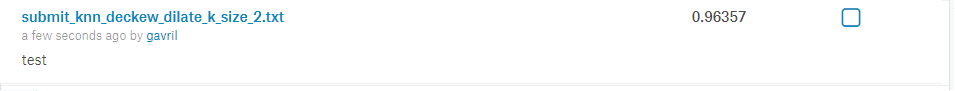

In [463]:
from IPython.display import Image
Image('submit_knn_deckew_dilate_k_size_2.png')

In [89]:
results=results.drop([51,52,53,54,55,56,57,58])

In [ ]:
train_img_deckew_gauss

In [115]:
kernels=[2,3,5]
methods=['erode','dilate','open','close']
for ker  in kernels:
    for met in methods:
        #print(ker,met)
        #print('train_img_deckew_'+met+'_k_size_'+str(ker))
        globals()['train_img_deckew_gauss_'+met+'_k_size_'+str(ker)]=np.array(list(map(partial(Morpholog_transformation,method=met,k_size=ker),train_img_deckew_gauss)))
        X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_deckew_gauss_'+met+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
        for est in estimators: 
            globals()[est+'_deckew_gauss_'+met+'_k_size_'+str(ker)]=estimators[est]
            eval(est+'_deckew_gauss_'+met+'_k_size_'+str(ker)).fit(X_train,y_train)
            cross_val_scores = cross_val_score(eval(est+'_deckew_gauss_'+met+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
            valid_score=accuracy_score(y_valid, eval(est+'_deckew_gauss_'+met+'_k_size_'+str(ker)).predict(X_valid))
            print('____________________________________________________________________')
            print(ker,met)
            print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
            results = results.append({'model' : est+'_deckew_gauss_'+met+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
           

____________________________________________________________________
2 erode
knn Mean_cross_val_Accuracy  0.925918162159429  Valid_Accuracy:  0.9267460317460318
____________________________________________________________________
2 dilate
knn Mean_cross_val_Accuracy  0.908333246195068  Valid_Accuracy:  0.9131746031746032
____________________________________________________________________
2 open
knn Mean_cross_val_Accuracy  0.9188095196843367  Valid_Accuracy:  0.9206349206349206
____________________________________________________________________
2 close
knn Mean_cross_val_Accuracy  0.9147962027024269  Valid_Accuracy:  0.9188888888888889
____________________________________________________________________
3 erode
knn Mean_cross_val_Accuracy  0.9298640996986913  Valid_Accuracy:  0.9321428571428572
____________________________________________________________________
3 dilate
knn Mean_cross_val_Accuracy  0.9014966836394167  Valid_Accuracy:  0.9062698412698412
_____________________________

In [ ]:
knn_deckew_dilate_k_size_2

In [ ]:
pred_test_deckew_dilate_k_size_2=knn_deckew_dilate_k_size_2.predict(np.resize(test_img_deckew_dilate_k_size_2, (test.shape[0], 28*28)))

In [457]:
with open('submit_knn_deckew_dilate_k_size_2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_deckew_dilate_k_size_2, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

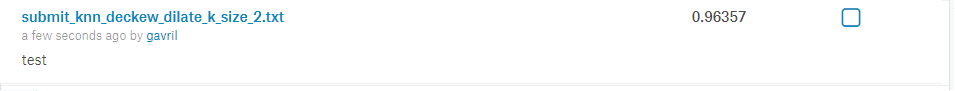

In [463]:
from IPython.display import Image
Image('submit_knn_deckew_dilate_k_size_2.png')

In [116]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
    #'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    #'XGB': XGBClassifier(n_jobs=-1)
}

In [117]:
kernels=[2,3]
methods=['dilate','close','erode','open']
for ker  in kernels:
    for met in methods:
        #print(ker,met)
        #print('train_img_deckew_'+met+'_k_size_'+str(ker))
        globals()['train_img_'+met+'_k_size_'+str(ker)]=np.array(list(map(partial(Morpholog_transformation,method=met,k_size=ker),train_img)))
        X_train, X_valid, y_train, y_valid = train_test_split(np.resize(eval('train_img_'+met+'_k_size_'+str(ker)), (train.shape[0], 28*28)), train_label, test_size=0.30, random_state=42)
        
        
        for est in estimators: 
            globals()[est+'_'+met+'_k_size_'+str(ker)]=estimators[est]
            eval(est+'_'+met+'_k_size_'+str(ker)).fit(X_train,y_train)
            cross_val_scores = cross_val_score(eval(est+'_'+met+'_k_size_'+str(ker)), X_train,y_train, cv=5,n_jobs=-1)
            valid_score=accuracy_score(y_valid, eval(est+'_'+met+'_k_size_'+str(ker)).predict(X_valid))
            print('____________________________________________________________________')
            print(ker,met)
            print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
            results = results.append({'model' : est+'_'+met+'_k_size_'+str(ker) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)

____________________________________________________________________
2 dilate
knn Mean_cross_val_Accuracy  0.9543875783724266  Valid_Accuracy:  0.9569047619047619
____________________________________________________________________
2 close
knn Mean_cross_val_Accuracy  0.957040981414259  Valid_Accuracy:  0.9595238095238096


C:\Users\gpog001\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


____________________________________________________________________
2 erode
knn Mean_cross_val_Accuracy  0.9557825415169192  Valid_Accuracy:  0.9598412698412698
____________________________________________________________________
2 open
knn Mean_cross_val_Accuracy  0.9592179394562592  Valid_Accuracy:  0.9628571428571429
____________________________________________________________________
3 dilate
knn Mean_cross_val_Accuracy  0.9463260631817103  Valid_Accuracy:  0.9474603174603174
____________________________________________________________________
3 close
knn Mean_cross_val_Accuracy  0.9531971136705234  Valid_Accuracy:  0.9551587301587302
____________________________________________________________________
3 erode
knn Mean_cross_val_Accuracy  0.9356470557357582  Valid_Accuracy:  0.9404761904761905
____________________________________________________________________
3 open
knn Mean_cross_val_Accuracy  0.9536730903210436  Valid_Accuracy:  0.9568253968253968


In [ ]:
#results=results.drop([83,81])

In [ ]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

In [ ]:
test_img_deckew_erode_k_size_2=np.array(list(map(partial(Morpholog_transformation,method='erode',k_size=2),test_img_deckew)))

In [ ]:
pred_test_deckew_erode_k_size_2=knn_dilate_k_size_2.predict(np.resize(test_img_deckew_erode_k_size_2, (test.shape[0], 28*28)))

In [245]:
with open('submit_knn_deckew_erode_k_size_2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_deckew_erode_k_size_2, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

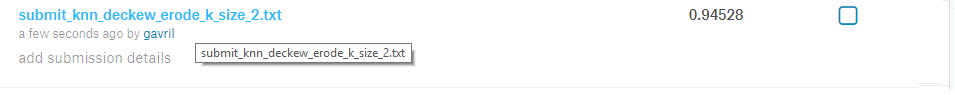

In [247]:
#ДАЖЕ ХУЖЕ СТАЛО
from IPython.display import Image
Image('submit_knn_deckew_erode_k_size_2.png')

### Попробуем агументацию

In [239]:
train_aug=np.vstack((train_img,train_img_deckew,train_img_dilate_k_size_2,train_img_close_k_size_2,train_img_open_k_size_2,train_img_erode_k_size_2))

In [240]:
label_aug=np.concatenate((train_label,train_label,train_label,train_label,train_label,train_label))

In [241]:
train_aug=binar(train_aug)

In [242]:
X_aug_train, X_aug_valid, y_aug_train, y_aug_valid = train_test_split(np.resize(train_aug, (train_aug.shape[0], 28*28)), label_aug, test_size=0.30, random_state=42)

In [243]:
%%time
model=KNeighborsClassifier(n_jobs=-1)
model.fit(X_aug_train,y_aug_train)

Wall time: 12min 48s


In [244]:
%%time
accuracy_score(y_aug_valid, model.predict(X_aug_valid))

Wall time: 32min 47s


0.9882275132275132

In [255]:
pred_test_aug=model.predict(np.resize(binar(test_img), (test.shape[0], 28*28)))

KeyboardInterrupt: 

In [269]:
with open('submit_aug.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_aug, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

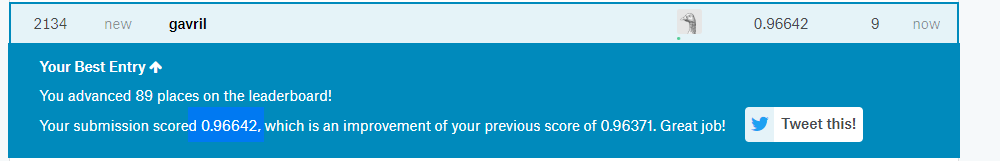

In [298]:
from IPython.display import Image
Image('submit_aug.png')

In [118]:
results.sort_values(by=['Valid_Accuracy'], ascending=False)

,model,Mean_cross_val_Accuracy,Valid_Accuracy
67,knn_deckew_gauss,0.973912,0.976587
33,knn_deckew,0.973912,0.976587
27,knn_gauss_k_size_3,0.964966,0.967778
43,knn_deckew_erode_k_size_2,0.965646,0.967143
47,knn_deckew_open_k_size_2,0.962993,0.965714
0,knn,0.962245,0.965556
41,knn_deckew_close_k_size_1,0.963401,0.965238
39,knn_deckew_open_k_size_1,0.963401,0.965238
37,knn_deckew_dilate_k_size_1,0.963401,0.965238
35,knn_deckew_erode_k_size_1,0.963401,0.965238


In [288]:
X_aug_train_deckew, X_aug_valid_deckew, y_aug_train, y_aug_valid = train_test_split(np.resize(train_aug_deckew, (train_aug.shape[0], 28*28)), label_aug, test_size=0.30, random_state=42)

In [263]:
%%time
model=KNeighborsClassifier(n_jobs=-1)
model.fit(X_aug_train_deckew,y_aug_train)

Wall time: 12min 1s


In [264]:
%%time
accuracy_score(y_aug_valid, model.predict(X_aug_valid))

Wall time: 30min 53s


0.9882275132275132

In [265]:
pred_test_aug_deckew2=model.predict(np.resize(binar(test_img_deckew), (test.shape[0], 28*28)))

In [294]:
pred_test_aug_deckew2

array([2., 0., 9., ..., 3., 9., 2.])

In [296]:
with open('submit_aug_deckew.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_aug_deckew2, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

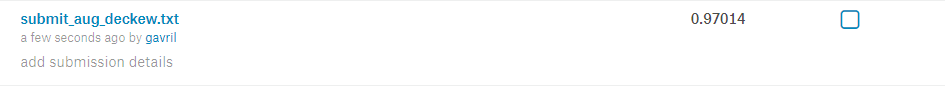

In [297]:
from IPython.display import Image
Image('submit_aug_deckew.png')

In [303]:
estimators = {
    
   
    'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
   # 'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    #'XGB': XGBClassifier(n_jobs=-1)
}

### PCA

### Поробуем PCA на изначальных призак


In [304]:
from sklearn.decomposition import PCA

In [305]:
n_components_=[1,2,3,4,5,10,20,30,40,50,60,70,80,90,100,120,200,250,400]
valid_scores_ = np.zeros(len(n_components_))
cross_val_scores_=np.zeros(len(n_components_))

In [306]:
#Подберем лучшее число компонент
for i, n_components in enumerate(n_components_):
    pca = PCA(n_components=n_components)
    pca.fit(np.resize(train_img, (train.shape[0], 28*28)))
    transform = pca.transform(np.resize(train_img, (train.shape[0], 28*28)))
    X_train, X_valid, y_train, y_valid =train_test_split(transform , train_label, test_size=0.30, random_state=42)
    for est in estimators:
        globals()[est+'_pca_n_components_'+str(n_components)]=estimators[est]
        eval(est+'_pca_n_components_'+str(n_components)).fit(X_train,y_train)
        valid_score=accuracy_score(y_valid, eval(est+'_pca_n_components_'+str(n_components)).predict(X_valid))
        cross_val_scores = cross_val_score(eval(est+'_pca_n_components_'+str(n_components)), X_train,y_train, cv=5,n_jobs=-1)
        print('n_components',i)
        print(cross_val_scores)
        valid_scores_[i]=valid_score
        cross_val_scores_[i]=cross_val_scores.mean()
        print('____________________________________________________________________')
        print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
        #results = results.append({'model' : est+'_pca_n_components_'+str(n_components) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    
    

n_components 0
[0.27209381 0.27371642 0.26518115 0.27084042 0.26322954]
____________________________________________________________________
knn Mean_cross_val_Accuracy  0.2690122701534974  Valid_Accuracy:  0.27134920634920634
n_components 1
[0.41740313 0.41567494 0.42184045 0.41153454 0.41926153]
____________________________________________________________________
knn Mean_cross_val_Accuracy  0.41714291604471604  Valid_Accuracy:  0.4184126984126984
n_components 2
[0.48164514 0.4933696  0.4863072  0.47601225 0.4762634 ]
____________________________________________________________________
knn Mean_cross_val_Accuracy  0.4827195170792692  Valid_Accuracy:  0.4842063492063492
n_components 3
[0.62457512 0.61747705 0.62187447 0.62691392 0.62157563]
____________________________________________________________________
knn Mean_cross_val_Accuracy  0.6224832372322929  Valid_Accuracy:  0.6194444444444445
n_components 4
[0.74065262 0.72458348 0.74043205 0.73698537 0.73268674]
______________________

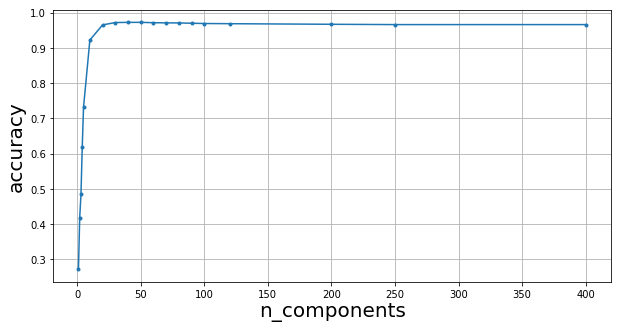

In [307]:
plt.figure(figsize=(10,5))
plt.plot(n_components_,valid_scores_,'.-')
#plt.plot(n_components_,cross_val_scores_,'k.-')
plt.xlabel("n_components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

In [308]:
for x,y in zip(valid_scores_,n_components_):
    if x==valid_scores_.max():
        print(x,y)

0.9723809523809523 40
0.9723809523809523 50


In [309]:
estimators = {
    
   
    #'knn': KNeighborsClassifier(n_jobs=-1),
    #'tree': DecisionTreeClassifier(),
   # 'forest': linear_model.SGDClassifier(n_jobs=-1),
    #'SVC': LinearSVC(),
    'XGB': XGBClassifier(n_jobs=-1)
}

In [310]:
for i, n_components in enumerate(n_components_):
    pca = PCA(n_components=n_components)
    pca.fit(np.resize(train_img, (train.shape[0], 28*28)))
    transform = pca.transform(np.resize(train_img, (train.shape[0], 28*28)))
    X_train, X_valid, y_train, y_valid =train_test_split(transform , train_label, test_size=0.30, random_state=42)
    for est in estimators:
        globals()[est+'_pca_n_components_'+str(n_components)]=estimators[est]
        eval(est+'_pca_n_components_'+str(n_components)).fit(X_train,y_train)
        valid_score=accuracy_score(y_valid, eval(est+'_pca_n_components_'+str(n_components)).predict(X_valid))
        cross_val_scores = cross_val_score(eval(est+'_pca_n_components_'+str(n_components)), X_train,y_train, cv=5,n_jobs=-1)
        print('n_components',i)
        print(cross_val_scores)
        valid_scores_[i]=valid_score
        cross_val_scores_[i]=cross_val_scores.mean()
        print('____________________________________________________________________')
        print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
        #results = results.append({'model' : est+'_pca_n_components_'+str(n_components) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    
    

n_components 0
[0.3025153  0.30754845 0.30311277 0.30214359 0.29726051]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.3025161232441935  Valid_Accuracy:  0.3115079365079365
n_components 1
[0.45564242 0.46939816 0.46147304 0.45066349 0.46469287]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.4603739970280567  Valid_Accuracy:  0.46555555555555556
n_components 2
[0.50645819 0.52652159 0.52253785 0.51207894 0.52067381]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.5176540762317515  Valid_Accuracy:  0.5183333333333333
n_components 3
[0.62236574 0.63345801 0.62510631 0.6136441  0.61800238]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6225153068940485  Valid_Accuracy:  0.6294444444444445
n_components 4
[0.71770904 0.7133628  0.71780915 0.71503913 0.72094606]
_______________________

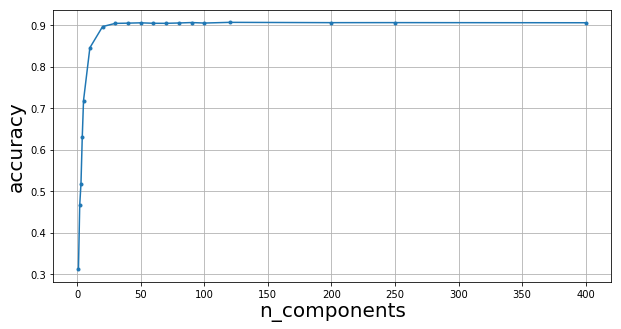

In [311]:
plt.figure(figsize=(10,5))
plt.plot(n_components_,valid_scores_,'.-')
#plt.plot(n_components_,cross_val_scores_,'k.-')
plt.xlabel("n_components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

In [312]:
for x,y in zip(valid_scores_,n_components_):
    if x==valid_scores_.max():
        print(x,y)

0.9063492063492063 120


In [ ]:
# Проделаем тоже самое для выровненных картинок

n_components 0
[0.28382053 0.28017681 0.29086579 0.28070772 0.28177642]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.2834694549234125  Valid_Accuracy:  0.28595238095238096
n_components 1
[0.43354861 0.44355661 0.43476782 0.42548486 0.44393398]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.43625837523206323  Valid_Accuracy:  0.44047619047619047
n_components 2
[0.59755269 0.59537572 0.58292227 0.59663151 0.59298962]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.593094360270609  Valid_Accuracy:  0.5962698412698413
n_components 3
[0.67063222 0.6616797  0.6645688  0.67420891 0.66530543]
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6672790141028488  Valid_Accuracy:  0.6652380952380952
n_components 4
[0.74269205 0.74991499 0.74247321 0.74753317 0.7452782 ]
______________________

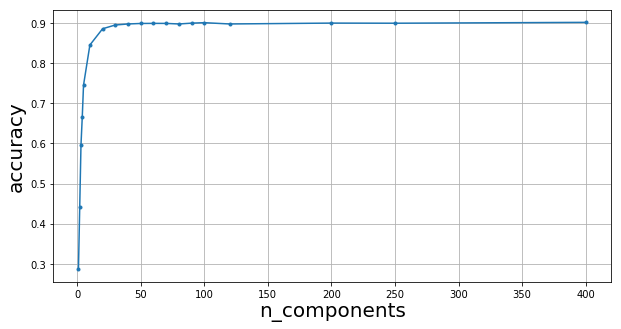

In [313]:

for i, n_components in enumerate(n_components_):
    pca = PCA(n_components=n_components)
    pca.fit(np.resize(train_img_deckew, (train.shape[0], 28*28)))
    transform = pca.transform(np.resize(train_img, (train.shape[0], 28*28)))
    X_train, X_valid, y_train, y_valid =train_test_split(transform , train_label, test_size=0.30, random_state=42)
    for est in estimators:
        globals()[est+'_pca_n_components_'+str(n_components)]=estimators[est]
        eval(est+'_pca_n_components_'+str(n_components)).fit(X_train,y_train)
        valid_score=accuracy_score(y_valid, eval(est+'_pca_n_components_'+str(n_components)).predict(X_valid))
        cross_val_scores = cross_val_score(eval(est+'_pca_n_components_'+str(n_components)), X_train,y_train, cv=5,n_jobs=-1)
        print('n_components',i)
        print(cross_val_scores)
        valid_scores_[i]=valid_score
        cross_val_scores_[i]=cross_val_scores.mean()
        print('____________________________________________________________________')
        print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
        #results = results.append({'model' : est+'_pca_n_components_'+str(n_components) , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    
    

plt.figure(figsize=(10,5))
plt.plot(n_components_,valid_scores_,'.-')
#plt.plot(n_components_,cross_val_scores_,'k.-')
plt.xlabel("n_components", size=20)
plt.ylabel("accuracy", size=20)
plt.grid(which="both")

for x,y in zip(valid_scores_,n_components_):
    if x==valid_scores_.max():
        print(x,y)

In [314]:
for x,y in zip(valid_scores_,n_components_):
    if x==valid_scores_.max():
        print(x,y)

0.9019047619047619 400


In [ ]:
pca = PCA(n_components=50)
pca.fit(np.resize(train_img, (train.shape[0], 28*28)))
train_pca_n_comp_50 = pca.transform(np.resize(train_img, (train.shape[0], 28*28)))
test_pca_n_comp_50 = pca.transform(np.resize(test_img, (test.shape[0], 28*28)))

In [ ]:
clf = KNeighborsClassifier()
clf.fit(train_pca_n_comp_50,train_label)
#train_predictions=clf.predict(train_pca_n_comp_50)
pred_test_pca_n_components_50=clf.predict(test_pca_n_comp_50)

In [ ]:
pred_test_pca_n_components_50

In [419]:
with open('submit_pca_n_components_50.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test_aug, 1):
        dst.write('%s,%s\n' % (i, int(p) ))

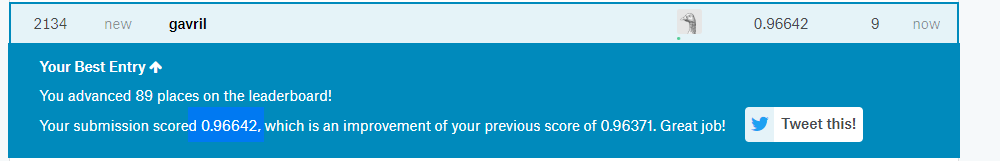

In [372]:
#pca на изнчальных признкаах дала тот же результат, что и и простой knn на аугументрованных признаках
from IPython.display import Image
Image('submit_aug.png')

### HOG

In [316]:
def hog(X,ksize=3):
    sobel_x = np.zeros_like(X)
    sobel_y = np.zeros_like(X)
    for i in range(len(X)):
        sobel_x[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=1, dy=0, ksize=ksize)
        sobel_y[i] = cv2.Sobel(X[i], cv2.CV_64F, dx=0, dy=1, ksize=ksize)
        
        #angle and length of a vector
    g, theta = cv2.cartToPolar(sobel_x, sobel_y)
    return g, theta
   
        

In [317]:
train_deckew_g, train_deckew_theta=hog(train_img)

In [318]:
test_deckew_g, test_deckew_theta=hog(test_img)

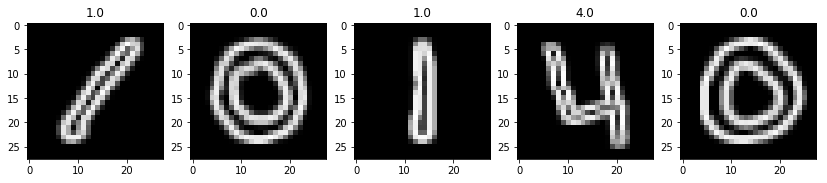

In [319]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_deckew_g[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])
    

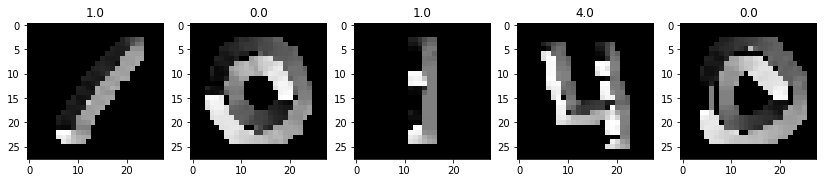

In [320]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_deckew_theta[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1])

In [253]:
#train_deckew_g, train_deckew_theta
train_deckew_hist = np.zeros((len(train_img_deckew), 16))
for i in range(len(train_img_deckew)):
    hist, borders = np.histogram(train_deckew_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_deckew_g[i])
    train_deckew_hist[i] = hist

In [254]:
test_deckew_hist = np.zeros((len(test_img_deckew), 16))
for i in range(len(test_img_deckew)):
    hist, borders = np.histogram(test_deckew_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_deckew_g[i])
    test_deckew_hist[i] = hist

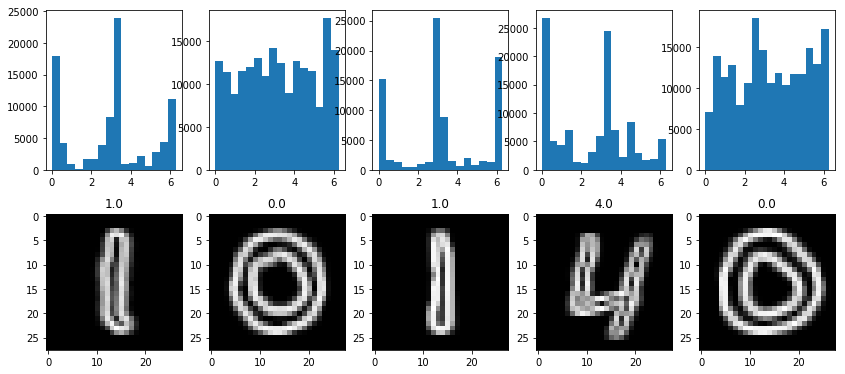

In [260]:

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_deckew_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_deckew_theta[i - 1].flatten(),
             bins=16, weights=train_deckew_g[i - 1].flatten())

## Нормируем вектор гистограммы

In [261]:
# По умолчанию используется L2 норма
train_deckew_hist = train_deckew_hist / np.linalg.norm(train_deckew_hist, axis=1)[:, None]

In [262]:
test_deckew_hist = test_deckew_hist / np.linalg.norm(test_deckew_hist, axis=1)[:, None]

In [263]:
X_deckew_hist_train, X_deckew_hist_valid, y_train, y_valid = train_test_split(train_deckew_hist, train_label, test_size=0.30, random_state=42)

In [264]:
%%time
for est in estimators: 
    globals()[est+'_deckew_hist']=estimators[est]
    eval(est+'_deckew_hist').fit(X_deckew_hist_train,y_train)
    cross_val_scores = cross_val_score(eval(est+'_deckew_hist'), X_deckew_hist_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_deckew_hist').predict(X_deckew_hist_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_deckew_hist' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.6743882348697297  Valid_Accuracy:  0.6763492063492064
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6959523443939473  Valid_Accuracy:  0.6973809523809524
____________________________________________________________________
Wall time: 44 s


In [265]:
train_g, train_theta=hog(train_img)

In [266]:
test_g, test_theta=hog(test_img)

In [267]:
 #Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [268]:
test_hist = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [269]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [270]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

In [271]:
X_hist_train, X_hist_valid, y_train, y_valid = train_test_split(train_hist, train_label, test_size=0.30, random_state=42)

In [272]:
%%time
for est in estimators: 
    globals()[est+'_hist']=estimators[est]
    eval(est+'_hist').fit(X_hist_train,y_train)
    cross_val_scores = cross_val_score(eval(est+'_hist'), X_hist_train,y_train, cv=5,n_jobs=-1)
    valid_score=accuracy_score(y_valid, eval(est+'_hist').predict(X_hist_valid))
    print(est+' Mean_cross_val_Accuracy ',cross_val_scores.mean(),' Valid_Accuracy: ' ,valid_score)
    results = results.append({'model' : est+'_hist' , 'Mean_cross_val_Accuracy' : cross_val_scores.mean(),'Valid_Accuracy':valid_score} , ignore_index=True)
    print('____________________________________________________________________')

knn Mean_cross_val_Accuracy  0.5771069215620527  Valid_Accuracy:  0.5793650793650794
____________________________________________________________________
XGB Mean_cross_val_Accuracy  0.6310194509705583  Valid_Accuracy:  0.6265079365079365
____________________________________________________________________
Wall time: 33.1 s


In [ ]:
## чот сущевтенно  хуже стало